In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [5, 5]

In [2]:
def range_func(n,x):
    return np.sin(n*x)

# Домашнее задание по курсу "Траекторный анализ"
#### Выполнил студент группы 617 Киназаров Темирбек.

### В следующем блоке реализован алгоритм Грассбергера-Прокаччиа. Далее написаны функции для удоного исследования влиняния параметров рамерности вложения и временных задержек на углы наклона log-log графика в рассматриваемой задаче

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def grassberg_procaccia(data,emb_dim,time_delay,plot = None):
    indexes = np.arange(0,emb_dim,1)*time_delay

    orbit = np.array([data[indexes +i] for i in range(len(data)-(emb_dim-1)*time_delay)])
    n_points = len(orbit)

    data_std = np.std(data)

    min_n, max_n, factor = 0.1 * data_std, 0.7 * data_std, 1.03
    max_i = int(np.floor(np.log(1.0 * max_n / min_n) / np.log(factor)))
    r_vals = np.array([min_n * (factor ** i) for i in range(max_i + 1)])

    distances = np.zeros(shape=(n_points,n_points))
    r_matrix_base = np.zeros(shape=(n_points,n_points))

    for i in range(n_points):
        for j in range(i,n_points):
            distances[i][j] = np.linalg.norm(orbit[i]-orbit[j])
            r_matrix_base[i][j] = 1

    C_r = []
    for r in r_vals:
        r_matrix = r_matrix_base*r
        heavi_matrix = np.heaviside( r_matrix - distances, 0)
        corr_sum = (2/float(n_points*(n_points-1)))*np.sum(heavi_matrix)
        C_r.append(corr_sum)

    gradients = np.gradient(np.log2(C_r),np.log2(r_vals))
    gradients.sort()
    D = np.mean(gradients[-5:])

    if plot:
        plt.plot(np.log2(r_vals),np.log2(C_r))
        plt.xlabel("Distance r")
        plt.ylabel("C(r)")
        plt.title("Correlation sum in log2-log2 plot. Dimension D is "+str(round(D,2)))
        plt.show()
    
    return D



Для начала рассмотрим dt = 1/1000 и определим 1000 первых точек от точки 0

In [23]:
dt = 1/1000

In [24]:
# x0 = np.pi
N_n = 3
xs = range_func(N_n, [0 + dt*i for i in range(1000)])

Переберем все рамерности вложения и на взгляд оценим, где функция принимает значения плато. Кажется, что достаточно будет расммотреть первые 12 значений.

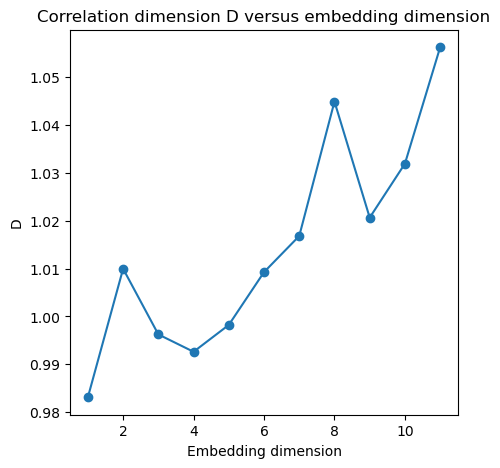

In [25]:
def plot_cor_dim(time_delay=20, max_emb_dim=12, min_emb_dim=1):
    Ds = []

    for emb_dim in range(min_emb_dim,max_emb_dim):
        timeseries = xs[:3000]

        D = grassberg_procaccia(timeseries,emb_dim,time_delay,plot=False)
        Ds.append(D)

    plt.plot(range(min_emb_dim,max_emb_dim),Ds,'o-')
    plt.xlabel("Embedding dimension")
    plt.ylabel("D")
    plt.title("Correlation dimension D versus embedding dimension")
    plt.show()
plot_cor_dim(time_delay=20)

Можно увидеть, что оптимальным числом, похоже, является рамерность вложения = 8

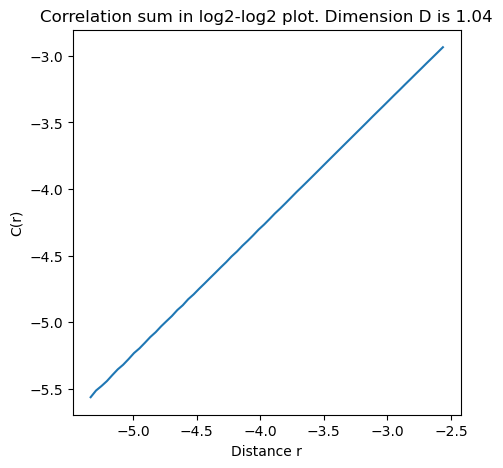

In [9]:
def plot_D(emb_dim, time_delay):
    timeseries = xs[:3000]

    D = grassberg_procaccia(timeseries,emb_dim,time_delay,plot=True)
plot_D(emb_dim=8, time_delay=20)

Рассмотрим теперь dt = $\pi/ 1000$

In [107]:
dt = np.pi/1000

In [108]:
xs = range_func(N_n, [0 + dt*i for i in range(1000)])

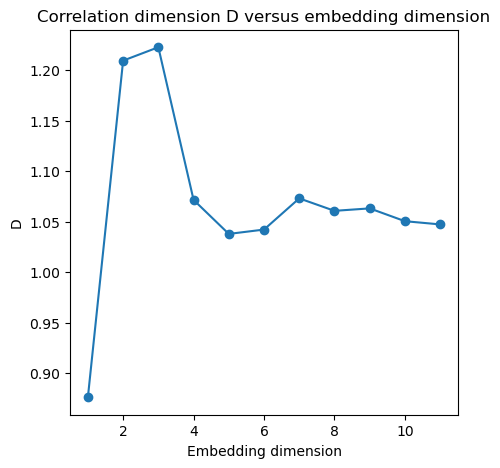

In [109]:
plot_cor_dim(time_delay=20)

Плато достигается в точке значении равном 3

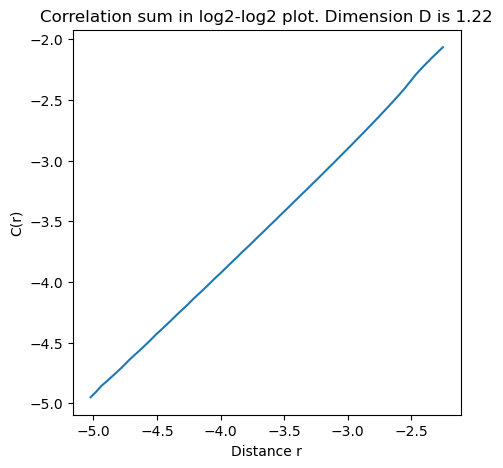

In [110]:
plot_D(emb_dim=3, time_delay=20)

Рассмотрим теперь различные значения параметра временных задержек

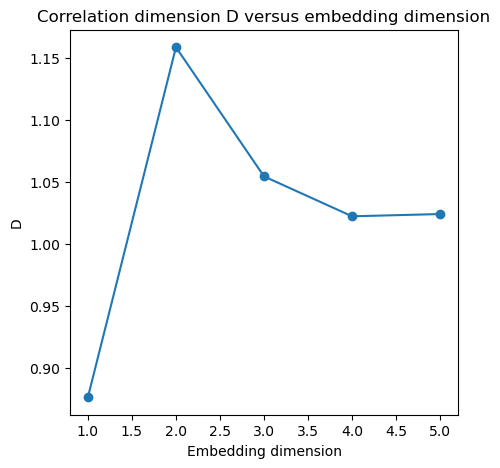

In [115]:
plot_cor_dim(time_delay=50, max_emb_dim=6)


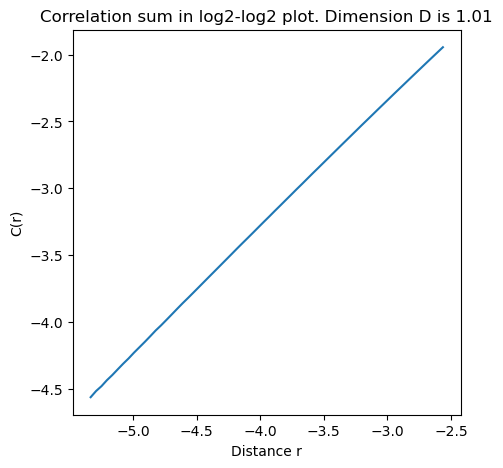

In [10]:
plot_D(emb_dim=2, time_delay=50)

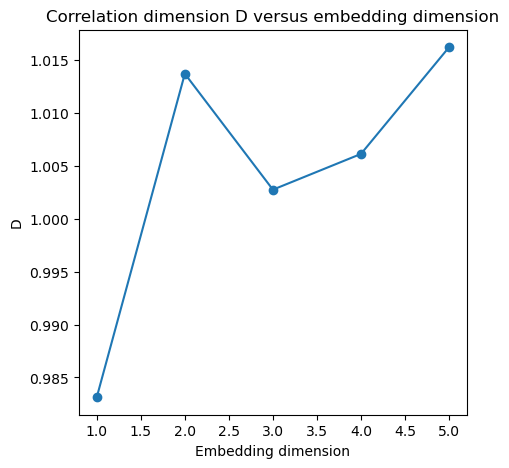

In [11]:
plot_cor_dim(time_delay=10, max_emb_dim=6)


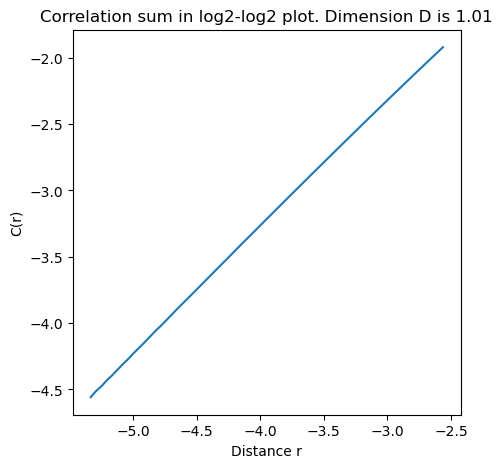

In [12]:
plot_D(emb_dim=2, time_delay=10)

Из всех представленных примеров кажется самой оптимальной рамерностью вложения будет раным 2, а оптимальный параметр временных задержек = 10
====

### Теперь рассмотрим dt = 1/10^5, определим 2000 первых точек от точки 0 и для оценки оптимальных рамерности вложения и параметра временных задержек повторим такие же процедуры

In [26]:
dt = 1/10**5
xs = range_func(N_n, [0 + dt*i for i in range(2000)])

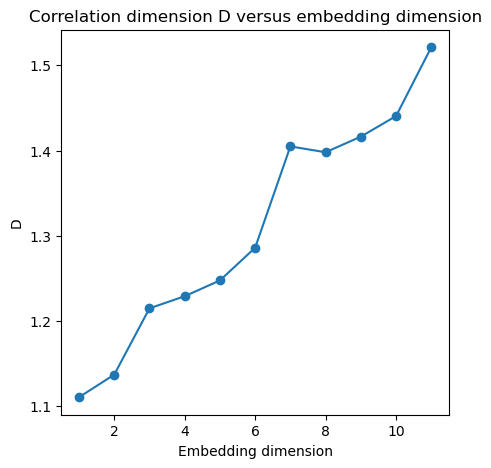

In [20]:
plot_cor_dim(time_delay=20)

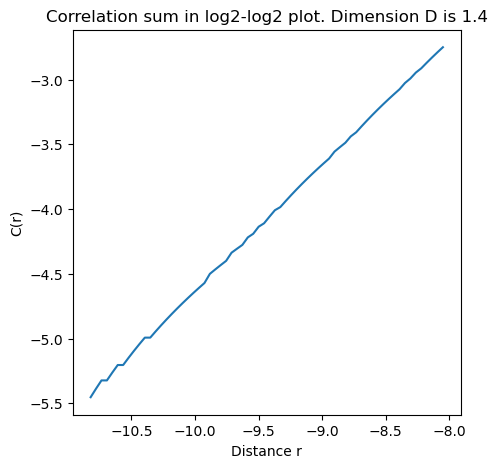

In [21]:
plot_D(emb_dim=7, time_delay=20)

Не похоже на оптимальный параметр. Поэтому попробуем выбрать рамерность вложения = 3, и увеличим параметр временных задержек.

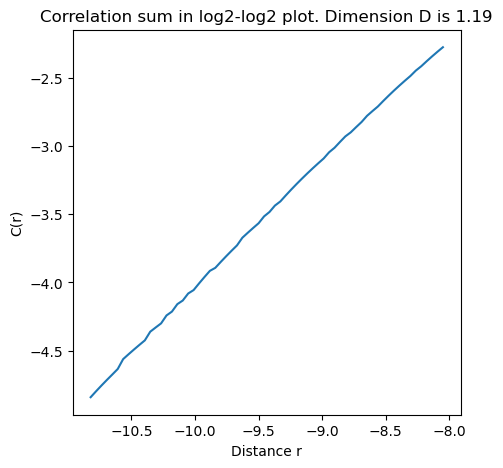

In [45]:
plot_D(emb_dim=3, time_delay=250)

Самым оптимальным рамерность вложения = 3, а параметр временных задержек = 250.

Выводом для параметра дискритизации = 1/10^5, думаю, можно сделать: поиск становится сложнее из-за бОльшей чувствительности графика к подбираемым параметрам. Но скорее всего благодаря этому удается после длительного поиска подбирать лучшие значения рамерности вложения и параметр временных задержек.